# **1. Problem Definition**

- **Objective:**
  Develop a machine learning model that classifies images of sign language gestures into predefined categories. The model will transform raw pixel data into meaningful predictions to assist in applications like accessibility tools for individuals with hearing impairments.

- **Problem Type:**
  A **multi-class classification problem** where each image belongs to one of predefined categories (e.g., letters or gestures of a sign language system).

- **Challenges:**
  - Handling high-dimensional data (784 pixel features per image).
  - Avoiding overfitting, especially with limited data
  - Ensuring class balance for fair and consistent performance across all categories.

- **Success Criteria:**
  - **Primary Metrics:** Accuracy, Precision, Recall, and F1-Score for individual classes and the overall model.
  - **Baseline Performance:** Model performance should significantly surpass random guessing or the majority class prediction.
  - **Interpretability:** Models should provide clear insights into feature importance or decision-making processes.
  - **Reproducibility:** The model pipeline should allow for straightforward reproduction of results in similar settings.

# **2. Data Collection/ Selection (Sign Language MNIST)**

- **Dataset Overview:**
  - **Name:** Sign Language MNIST
  - **Classes:** 24 (excluding `J` and `Z` due to their dynamic nature).
  - **Training Samples:** 27,455
  - **Test Samples:** 7,172
  - **Features:** 784 grayscale pixel values (flattened 28x28 images) per row.
  - **Labels:** One column representing integers 0–23, mapping to letters `A–Y` (excluding `J` and `Z`).

- **Sources and Validity:**
  - The dataset is derived from real-world American Sign Language gestures captured against various backgrounds.
  - Data underwent preprocessing (cropping, grayscale conversion, resizing, and augmentation) to ensure consistency.

- **Quality Checks:**
  - Ensure no missing or corrupted rows in the CSV file.
  - Validate that labels match their corresponding images.
  - Verify that pixel values are within the valid range [0, 255].

- **Challenges in Data Representation:**
  - Class imbalance: If some classes have fewer samples, the model might underperform on underrepresented gestures.
  - Noisy samples: Variations in gesture images (brightness, rotation) might introduce noise.
  - Feature representation: The data uses raw pixel values, so feature scaling is essential.

# **3. Data Exploration and Preparation**


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### **Reading the CSV Files**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV files
train_data = pd.read_csv("/content/drive/MyDrive/Sign Language Dataset/sign_mnist_train.csv")  # Replace with actual path
test_data = pd.read_csv("/content/drive/MyDrive/Sign Language Dataset/sign_mnist_test.csv")    # Replace with actual path


In [ ]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### **Splitting Features and Labels**

In [ ]:
# Separate features (X) and labels (y) from training data
X_train_full = train_data.iloc[:, 1:].values  # All columns except the first (label)
y_train_full = train_data['label'].values     # The first column (label)

# Test data
X_test = test_data.iloc[:, 1:].values
y_test = test_data['label'].values

# Create validation set from training data (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Validation Set: {X_val.shape}, {y_val.shape}")
print(f"Test Set: {X_test.shape}, {y_test.shape}")

Training Set: (21964, 784), (21964,)
Validation Set: (5491, 784), (5491,)
Test Set: (7172, 784), (7172,)


In [ ]:
# Using NumPy
import numpy as np

unique_labels = np.unique(y_train)
print("Unique Labels in Training Data:", unique_labels)

# Using set()
unique_labels_set = set(y_train)
print("Unique Labels in Training Data (Set):", unique_labels_set)


Unique Labels in Training Data: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Unique Labels in Training Data (Set): {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}


### **Data validation**

In [ ]:
print(f"Missing values in training data: {train_data.isnull().sum().sum()}")
print(f"Missing values in testing data: {test_data.isnull().sum().sum()}")


Missing values in training data: 0
Missing values in testing data: 0


In [ ]:
print(f"Pixel value range in training set: {X_train.min()} to {X_train.max()}")
print(f"Pixel value range in testing set: {X_test.min()} to {X_test.max()}")


Pixel value range in training set: 0 to 255
Pixel value range in testing set: 0 to 255


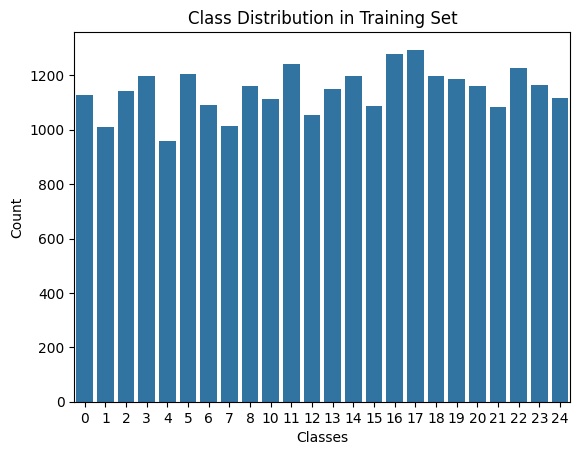

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_train_full)
plt.title("Class Distribution in Training Set")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()


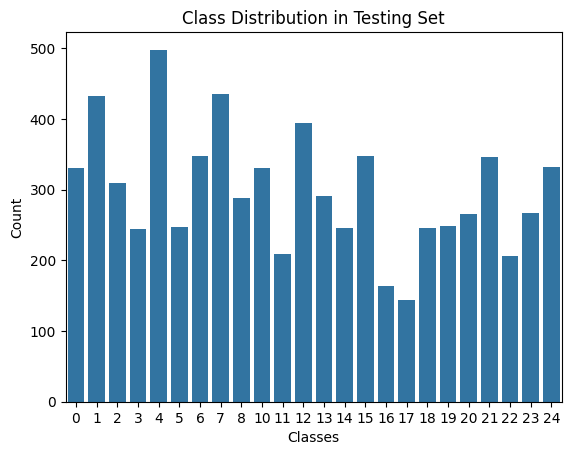

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_test)
plt.title("Class Distribution in Testing Set")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

### **Data preprocessing**

In [ ]:
# Normalize Pixel Values: Scale the pixel values to the range [0, 1] to improve model convergence:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [ ]:
# X_train = X_train.reshape(-1, 28, 28)
# X_val = X_val.reshape(-1, 28, 28)
# X_test = X_test.reshape(-1, 28, 28)

### **Exploratory Data Analysis (EDA)**

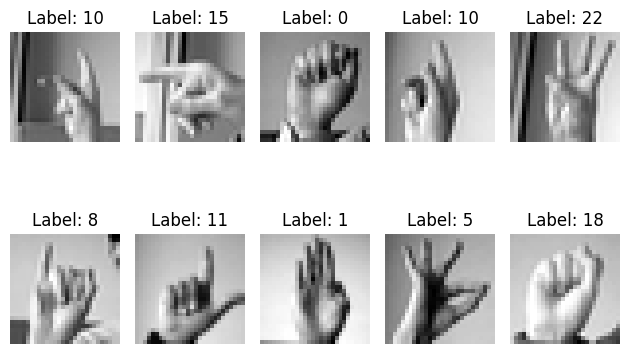

In [ ]:
import matplotlib.pyplot as plt

# Plot random samples
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')  # Reshape only if using 28x28 images
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# **Algorithm Selection**

#### **Traditional Machine Learning Methods**
1. **Random Forest Classifier**  
   - A robust ensemble method that works well with high-dimensional data.  
   - Handles feature interactions and noisy data effectively.  
   - **Pros:** High interpretability, suitable for tabular data like flattened pixel arrays.  
   - **Use Case:** Baseline for comparison with other techniques.
---

2. **Support Vector Machine (SVM)**
   - A powerful classifier for high-dimensional data.
   - Use an RBF (Radial Basis Function) kernel to capture non-linear patterns in the pixel data.
   - **Pros:** Strong theoretical guarantees, effective on smaller datasets.
   - **Cons:** Computationally expensive for large datasets.

---

3. **Logistic Regression (Multinomial)**
   - A simple linear classifier for multi-class problems.
   - Leverages probabilistic predictions and is fast to train.
   - **Pros:** Easy to implement, interpretable.
   - **Cons:** Limited performance with non-linear data.

---

#### **Deep Learning Techniques**
1. **Feedforward Neural Network (MLP)**
   - A basic multi-layer perceptron with one or more hidden layers.
   - Suitable for simple image classification tasks with flattened inputs.
   - **Pros:** Captures non-linear relationships, straightforward to implement.
   - **Cons:** Limited compared to convolutional neural networks for image data.

---

2. **Convolutional Neural Network (CNN)**
   - Designed specifically for image data; uses convolutional layers to capture spatial patterns.
   - **Pros:** State-of-the-art performance on image tasks, suitable for 2D input.
   - **Cons:** Requires more computational resources compared to traditional methods.
   - Suggested architecture:
     - Convolutional layers followed by max-pooling.
     - Fully connected layers for final classification.


# **4. Some functions**

In [ ]:
# Predict function
def predict_model(model, X_test):
    return model.predict(X_test)

# Training functions
def train_model(model, X_train, y_train):
    print(f"Training {type(model).__name__}...")
    model.fit(X_train, y_train)
    print("Training Complete!")
    return model

# Evaluate function
def evaluate_model(y_true, y_pred, labels=None):

    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=labels))

    # Accuracy
    acc = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {acc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def visualize_predictions(X, y_true, y_pred, n=10):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(2, n//2, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap="gray")  # Reshape if using raw pixel data
        plt.title(f"True: {y_true[i]}\nPred: {y_pred[i]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()



In [ ]:
import pickle

def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved to {filename}")

def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    print(f"Model loaded from {filename}")
    return model

# **5. Model Development and Training**

### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model = train_model(rf_model, X_train, y_train)

Training RandomForestClassifier...
Training Complete!


In [ ]:
# Save the Random Forest model
save_model(rf_model, "random_forest_model.pkl")


Model saved to random_forest_model.pkl


In [ ]:
# Class labels for evaluation
class_labels = []
for i in range(25):
  if i != 9:
    class_labels.append(chr(i + 65))

Validation Set Evaluation:
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       221
           B       1.00      1.00      1.00       188
           C       1.00      1.00      1.00       220
           D       1.00      1.00      1.00       256
           E       1.00      1.00      1.00       202
           F       1.00      1.00      1.00       242
           G       1.00      1.00      1.00       221
           H       1.00      1.00      1.00       205
           I       0.99      1.00      1.00       219
           K       1.00      1.00      1.00       219
           L       1.00      1.00      1.00       268
           M       1.00      0.98      0.99       232
           N       1.00      1.00      1.00       209
           O       1.00      1.00      1.00       219
           P       1.00      1.00      1.00       202
           Q       0.99      1.00      0.99       291
           R       1.00      1.

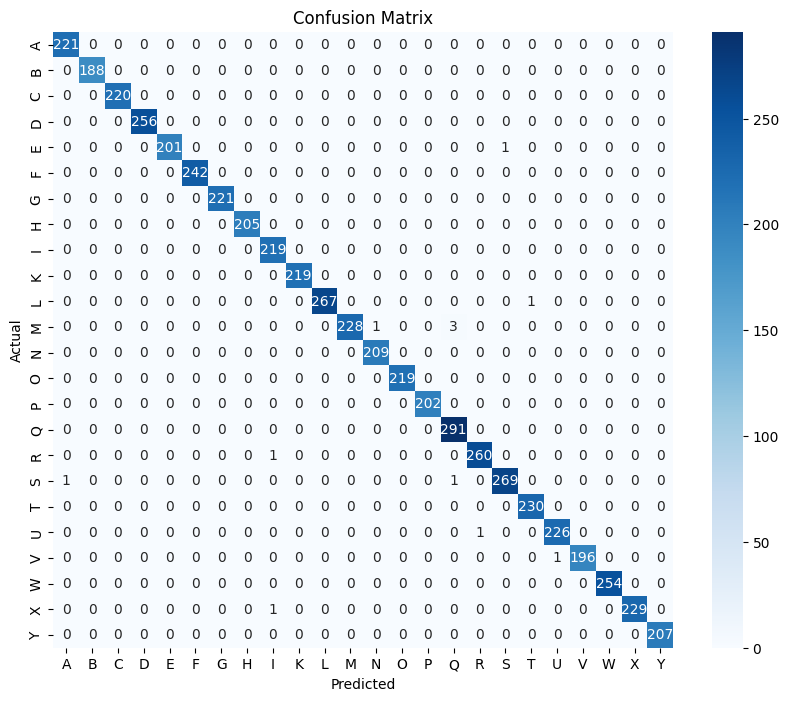

In [ ]:
# Evaluate on Validation Set
y_val_pred_rf = predict_model(rf_model, X_val)
print("Validation Set Evaluation:")
evaluate_model(y_val, y_val_pred_rf, labels=class_labels)

Test Set Evaluation:
Classification Report:
              precision    recall  f1-score   support

           A       0.91      1.00      0.96       331
           B       0.97      0.91      0.94       432
           C       0.91      0.99      0.95       310
           D       0.82      0.97      0.89       245
           E       0.88      0.96      0.92       498
           F       0.85      0.92      0.89       247
           G       0.93      0.81      0.87       348
           H       0.97      0.93      0.95       436
           I       0.81      0.74      0.77       288
           K       0.70      0.66      0.68       331
           L       0.80      0.98      0.88       209
           M       0.81      0.67      0.73       394
           N       0.73      0.54      0.62       291
           O       0.97      0.80      0.88       246
           P       0.95      0.99      0.97       347
           Q       0.92      0.99      0.95       164
           R       0.27      0.52    

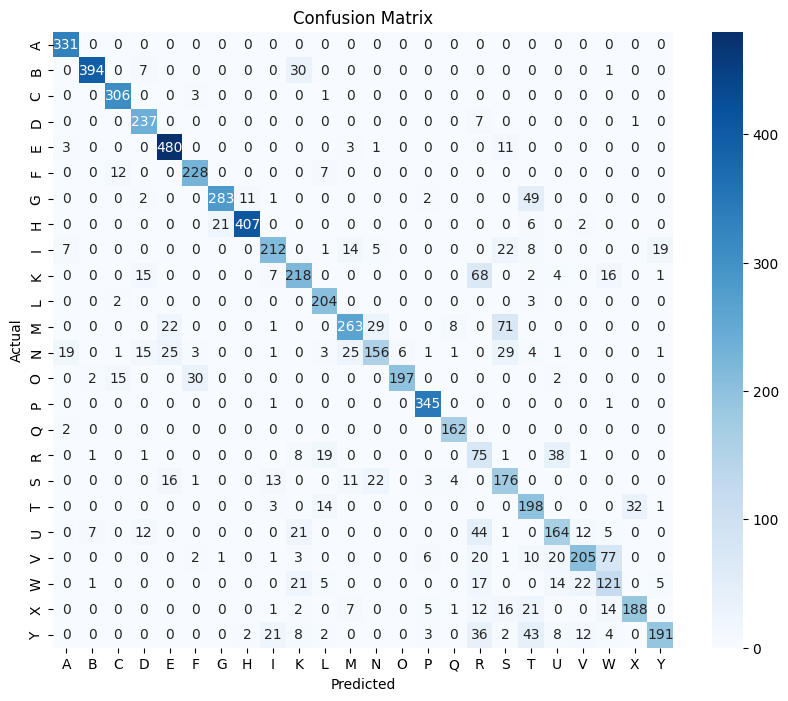

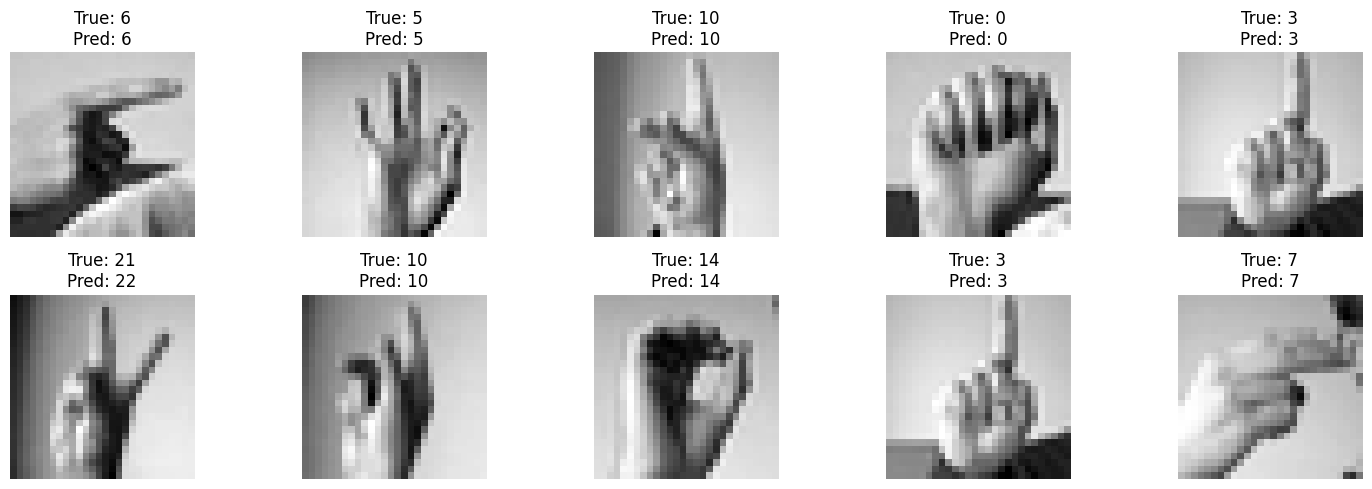

In [ ]:
# Predict on Test Set
y_test_pred_rf = predict_model(rf_model, X_test)
# Evaluate on Test Set
print("Test Set Evaluation:")
evaluate_model(y_test, y_test_pred_rf, labels=class_labels)

# Visualize predictions from the test set
visualize_predictions(X_test, y_test, y_test_pred_rf, n=10)

### **Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Train the SVM model
svm_model = train_model(svm_model, X_train, y_train)


Training SVC...
Training Complete!


In [ ]:
# Save the SVM model
save_model(svm_model, "svm_model.pkl")


Model saved to svm_model.pkl


Validation Set Evaluation for SVM:
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       221
           B       1.00      1.00      1.00       188
           C       1.00      1.00      1.00       220
           D       1.00      1.00      1.00       256
           E       1.00      1.00      1.00       202
           F       1.00      1.00      1.00       242
           G       1.00      1.00      1.00       221
           H       1.00      1.00      1.00       205
           I       1.00      1.00      1.00       219
           K       1.00      1.00      1.00       219
           L       1.00      1.00      1.00       268
           M       1.00      1.00      1.00       232
           N       1.00      1.00      1.00       209
           O       1.00      1.00      1.00       219
           P       1.00      1.00      1.00       202
           Q       1.00      1.00      1.00       291
           R       1.00

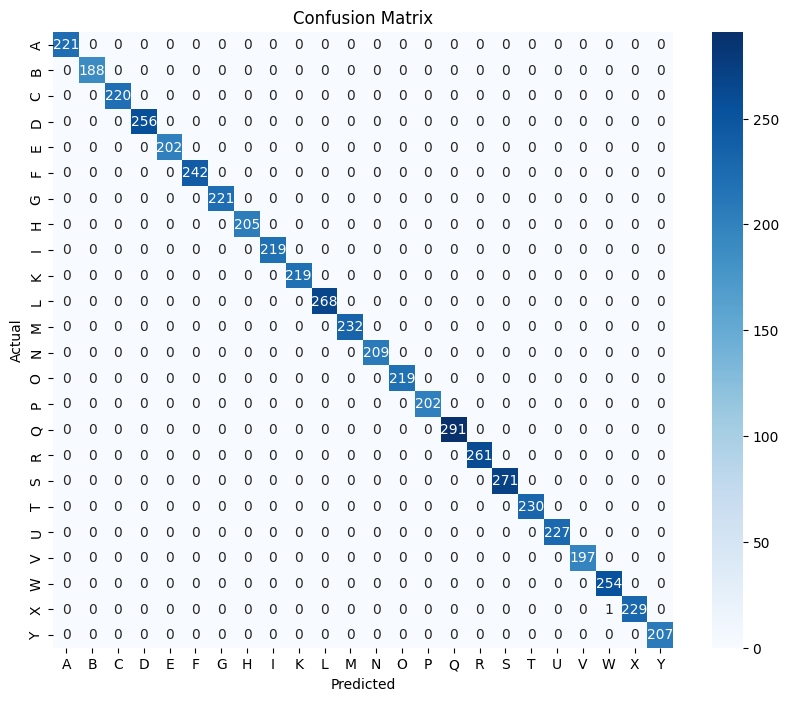

In [ ]:
# Predict on the validation set
y_val_pred_svm = predict_model(svm_model, X_val)

# Evaluate on validation set
print("Validation Set Evaluation for SVM:")
evaluate_model(y_val, y_val_pred_svm, labels=class_labels)


Test Set Evaluation for SVM:
Classification Report:
              precision    recall  f1-score   support

           A       0.94      1.00      0.97       331
           B       1.00      0.97      0.98       432
           C       0.88      0.99      0.93       310
           D       0.93      1.00      0.96       245
           E       0.93      0.99      0.96       498
           F       0.78      0.83      0.80       247
           G       0.93      0.92      0.93       348
           H       0.98      0.95      0.96       436
           I       0.79      0.89      0.84       288
           K       0.76      0.61      0.68       331
           L       0.87      1.00      0.93       209
           M       0.86      0.73      0.79       394
           N       0.90      0.68      0.78       291
           O       0.99      0.82      0.90       246
           P       1.00      1.00      1.00       347
           Q       1.00      0.99      0.99       164
           R       0.27      

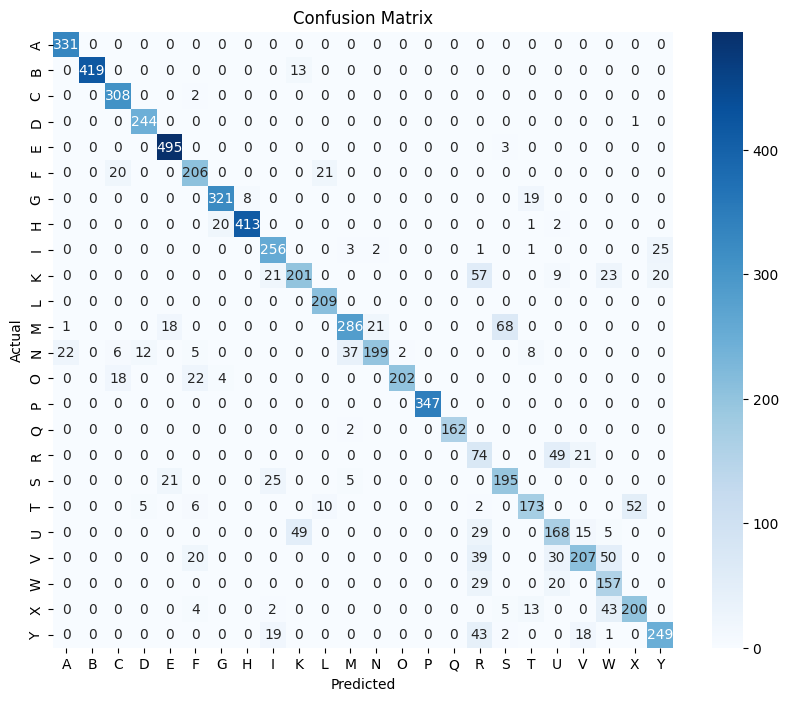

In [ ]:
# Predict on the test set
y_test_pred_svm = predict_model(svm_model, X_test)

# Evaluate on test set
print("Test Set Evaluation for SVM:")
evaluate_model(y_test, y_test_pred_svm, labels=class_labels)


### **Linear Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Train the Logistic Regression model
logistic_model = train_model(logistic_model, X_train, y_train)


Training LogisticRegression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Complete!


In [ ]:
# Predict on the validation set
y_val_pred_logistic = predict_model(logistic_model, X_val)

# Evaluate the model on the validation set
print("Validation Set Evaluation for Logistic Regression:")
evaluate_model(y_val, y_val_pred_logistic, labels=class_labels)
